# **Project 2 Report**

JALPA KAILA

CS658

## **P2-1. Decision Tree**

**(a) Develop a decision tree based classifier to classify the 3 different types of Iris (Setosa, Versicolour, and Virginica).**

In [ ]:
# Import libraries
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target labels (0: Setosa, 1: Versicolour, 2: Virginica)

# Select 10 samples from each class for the test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=None
)

print(f"Training dataset size: {len(X_train)} samples")
print(f"Test dataset size: {len(X_test)} samples")

# Initialize the Decision Tree Classifier

# clf = DecisionTreeClassifier(random_state=None)
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                             random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

# # Initialize 5-fold Stratified Cross-Validation
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize 5-fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

# Perform 5-fold cross-validation and track accuracy for each fold
fold_accuracies = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the decision tree on the current fold
    clf.fit(X_train_fold, y_train_fold)

    # Evaluate on the validation fold
    y_pred_fold = clf.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    fold_accuracies.append(accuracy)

# Display cross-validation results
print(f"Cross-validation accuracies: {fold_accuracies}")
print(f"Mean cross-validation accuracy: {np.mean(fold_accuracies):.2f}")

# Train the model on the full training dataset
clf.fit(X_train, y_train)


# Evaluate on the training dataset to get training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate on the test dataset
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the final test results

# Display training and test accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
# print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=iris.target_names))

Training dataset size: 120 samples
Test dataset size: 30 samples
Cross-validation accuracies: [0.9583333333333334, 0.9166666666666666, 1.0, 0.9583333333333334, 0.9583333333333334]
Mean cross-validation accuracy: 0.96
Training Accuracy: 1.00
Test Accuracy: 0.97


**Discussion:** This code uses the Iris dataset to train and evaluate a Decision Tree Classifier. It splits the data into training (120 Samples-40 samples from each Iris type) and testing (30 Samples-10 samples from each Iris type), ensuring stratified splits to maintain class proportions. A 5-fold stratified cross-validation evaluates the model across different splits and reports individual fold accuracies and the mean accuracy. After training on the full dataset, the model’s training and test accuracies are calculated and printed.

**(b) Show the confusion matrix of your decision tree. Plot this decision tree.**

Training dataset size: 120 samples
Test dataset size: 30 samples
Cross-validation accuracies: [0.9166666666666666, 0.875, 1.0, 0.9583333333333334, 0.9583333333333334]
Mean cross-validation accuracy: 0.94
Training Accuracy: 1.00
Test Accuracy: 0.97


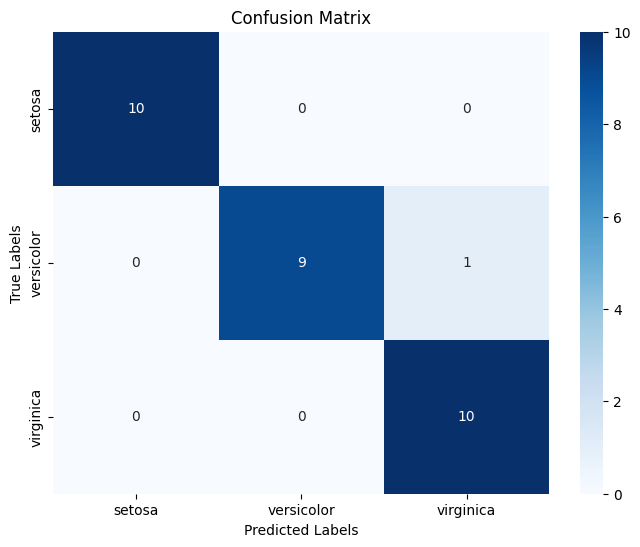

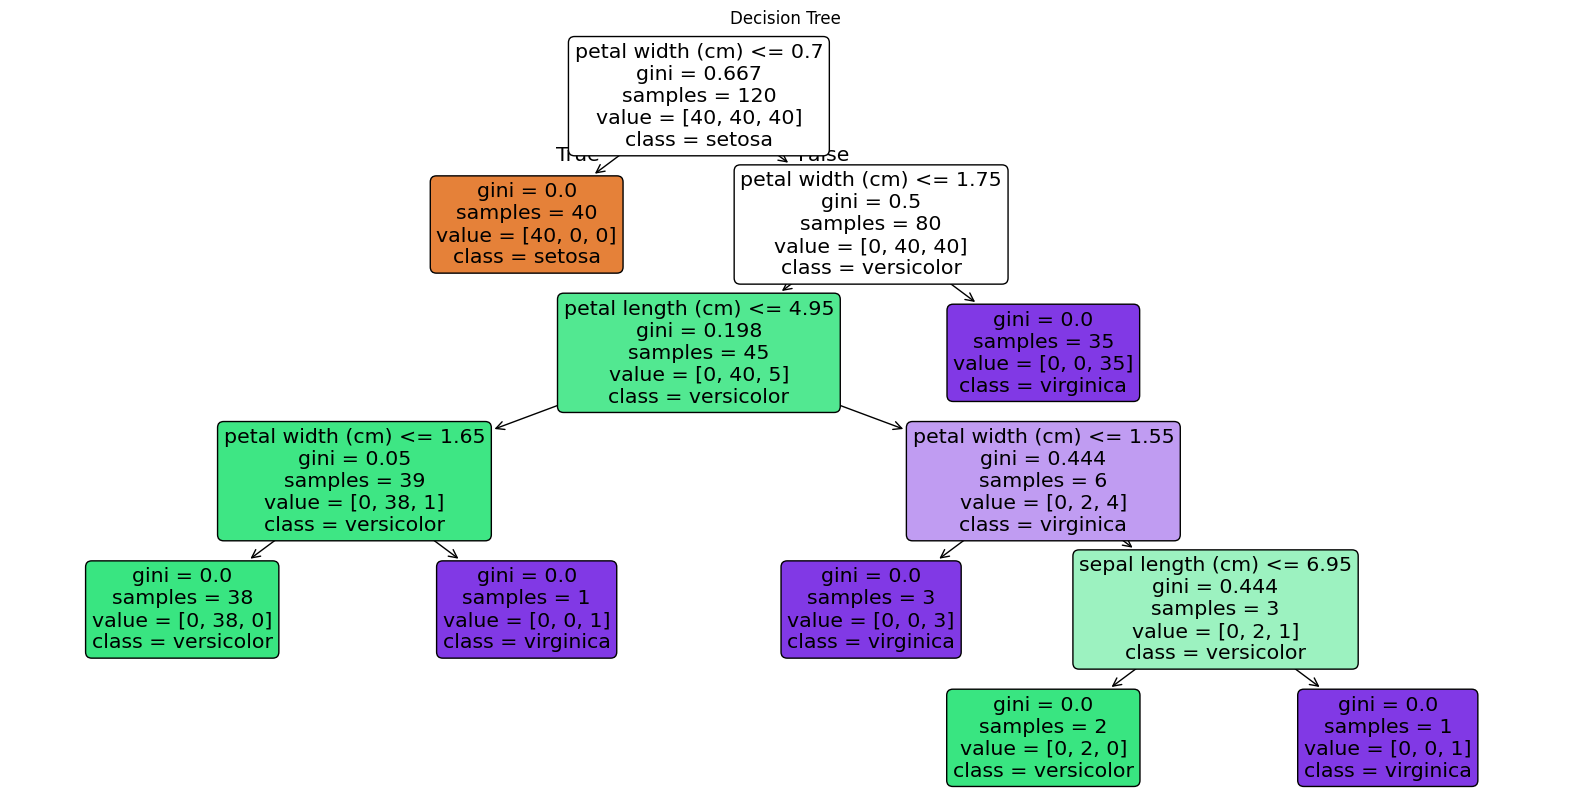

In [ ]:
# Import libraries
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target labels (0: Setosa, 1: Versicolour, 2: Virginica)

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=None
)

print(f"Training dataset size: {len(X_train)} samples")
print(f"Test dataset size: {len(X_test)} samples")

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
    min_samples_leaf=1, random_state=None
)

# Perform 5-fold Stratified Cross-Validation and track accuracy for each fold
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
fold_accuracies = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the decision tree on the current fold
    clf.fit(X_train_fold, y_train_fold)

    # Evaluate on the validation fold
    y_pred_fold = clf.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    fold_accuracies.append(accuracy)

# Display cross-validation results
print(f"Cross-validation accuracies: {fold_accuracies}")
print(f"Mean cross-validation accuracy: {np.mean(fold_accuracies):.2f}")

# Train the model on the full training dataset
clf.fit(X_train, y_train)

# Evaluate on the training dataset to get training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate on the test dataset
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display training and test accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Show the Confusion Matrix for the Test Set
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()

**Discussion:** The **confusion matrix** visualizes the model’s performance by showing correct and incorrect predictions for each class which helps to identify patterns like class overlap or misclassifications. It highlights true positives on the diagonal and errors in off-diagonal entries. The **decision tree** plot offers insights into the model's decision-making by displaying how features are split at each node. It shows which features are most important, with higher nodes indicating greater influence in classification. These visualizations provide performance of both the model and feature importance.

# **P2-2. Model Overfitting**

**(a) Generate the dataset as in slide 56 in Chapter 3.**

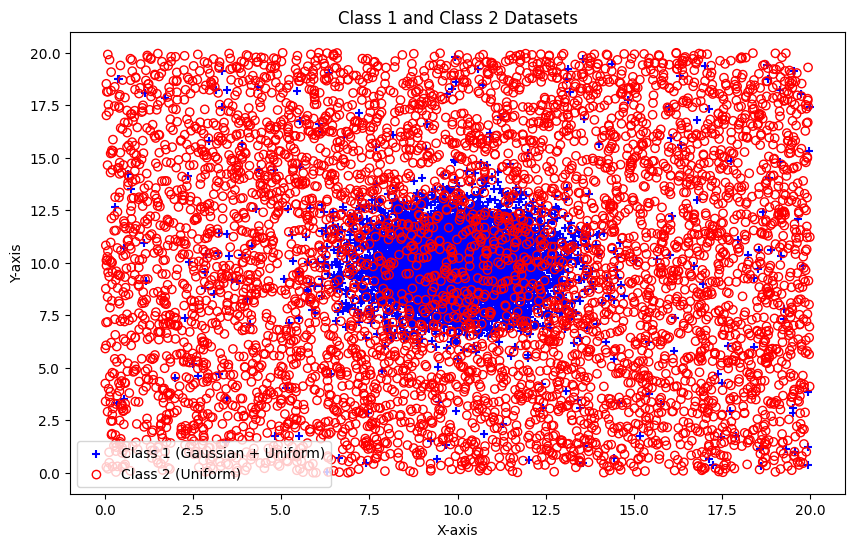

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# 1. Class 1: Generate 5000 Gaussian instances centered at (10, 10)
mean = [10, 10]
cov = [[2, 0], [0, 2]]  # Covariance matrix
class1_gaussian = np.random.multivariate_normal(mean, cov, 5000)

# 2. Class 1: Generate 200 instances uniformly distributed in the plane (0,0) to (20,20)
class1_uniform = np.random.uniform(low=[0, 0], high=[20, 20], size=(200, 2))

# Combine Class 1's Gaussian and Uniform data
class1_data = np.vstack((class1_gaussian, class1_uniform))

# 3. Class 2: Generate 5200 instances following a uniform distribution in the same plane
class2_data = np.random.uniform(low=[0, 0], high=[20, 20], size=(5200, 2))

# Plot the two classes
plt.figure(figsize=(10, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', marker='+', label='Class 1 (Gaussian + Uniform)')
plt.scatter(class2_data[:, 0], class2_data[:, 1], facecolors='none', edgecolors='red', marker='o', label='Class 2 (Uniform)')
plt.legend()
plt.title('Class 1 and Class 2 Datasets')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

**Discussion:** This code generates and visualizes two datasets to compare different distributions. Class 1 consists of 5000 Gaussian-distributed instances centered at (10, 10) and 200 uniformly distributed instances defined by the corner points {(0,0), (0,20), (20,0), (20,20)}. These are combined to form a mixed dataset. Class 2 consists of 5200 uniformly distributed instances in the same plane. The plot visualizes both datasets, with Class 1 marked in blue (‘+’) and Class 2 marked with red circles (‘o’). This plot represents how different distributions (Gaussian vs. Uniform) affect data structure and separation.

**(b) Randomly select 10% of the data as test dataset and the remaining 90% of the data as training dataset. Train decision trees by increasing the number of nodes of the decision trees until the training error becomes 0. Plot the training errors and the testing errors under different numbers of nodes and explain the model underfitting and model overfitting.**

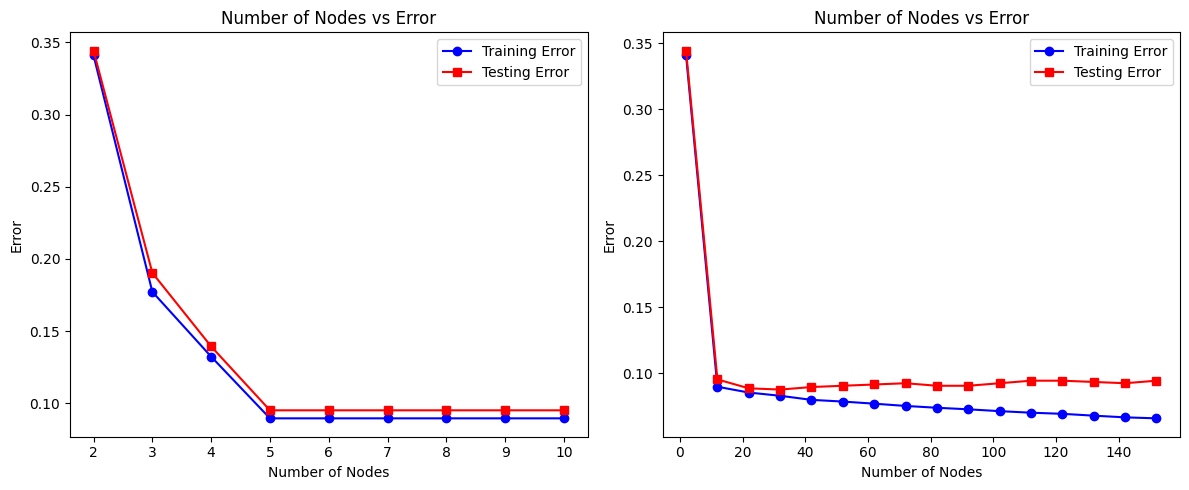

In [ ]:
# import libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Generate Data (Using Class 1 and Class 2 Data from Your Example)
mean = [10, 10]
cov = [[2, 0], [0, 2]]
class1_gaussian = np.random.multivariate_normal(mean, cov, 5000)
class1_uniform = np.random.uniform(low=[0, 0], high=[20, 20], size=(200, 2))
class1_data = np.vstack((class1_gaussian, class1_uniform))

class2_data = np.random.uniform(low=[0, 0], high=[20, 20], size=(5200, 2))

# Create Labels: Class 1 labeled as 0, Class 2 as 1
X = np.vstack((class1_data, class2_data))  # Combine both datasets
y = np.hstack((np.zeros(class1_data.shape[0]), np.ones(class2_data.shape[0])))  # 0 for Class 1, 1 for Class 2

# Step 2: Split Data into 90% Train and 10% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 3: Function to Train Decision Trees and Collect Errors
def get_errors(max_nodes_list):
    train_errors = []
    test_errors = []

    for max_nodes in max_nodes_list:
        # Train a Decision Tree with the given max number of nodes
        clf = DecisionTreeClassifier(max_leaf_nodes=max_nodes, random_state=42)
        clf.fit(X_train, y_train)

        # Calculate Training and Testing Errors
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)

        train_error = 1 - accuracy_score(y_train, train_pred)
        test_error = 1 - accuracy_score(y_test, test_pred)

        train_errors.append(train_error)
        test_errors.append(test_error)

    return train_errors, test_errors

# Step 4: Train and Collect Errors for 2 Sets of Graphs

# Case 1: Number of nodes from 2 to 11
nodes_10 = range(2, 11)
train_errors_10, test_errors_10 = get_errors(nodes_10)

# Case 2: Number of nodes from 2 to 161
nodes_160 = range(2, 161, 10)
train_errors_160, test_errors_160 = get_errors(nodes_160)

# Step 5: Plot the Graphs

# First Graph: 10 nodes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(nodes_10, train_errors_10, label='Training Error', marker='o', color='blue')
plt.plot(nodes_10, test_errors_10, label='Testing Error', marker='s', color='red')
plt.title('Number of Nodes vs Error')
plt.xlabel('Number of Nodes')
plt.ylabel('Error')
plt.legend()

# Second Graph: 160 nodes
plt.subplot(1, 2, 2)
plt.plot(nodes_160, train_errors_160, label='Training Error', marker='o', color='blue')
plt.plot(nodes_160, test_errors_160, label='Testing Error', marker='s', color='red')
plt.title('Number of Nodes vs Error')
plt.xlabel('Number of Nodes')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()

**Discussion:** Above code generates two classes of data, splits it into training and test sets, and evaluates the performance of decision trees with varying numbers of leaf nodes. Class 1 combines Gaussian and uniform data, while Class 2 follows a uniform distribution. Using train-test splitting (90% train, 10% test), the decision tree is trained multiple times with different number of nodes to track training and testing errors. Two graphs are plotted which represents the error with incresisng number of nodes. The graphs helps to visualize how model complexity affects errors and shows a trade-off between underfitting and overfitting.
In the code, **Underfitting** occurs when the model has too few nodes (e.g., 2 to 4), making it too simple to capture data patterns and leads to high errors on both training and test datasets. **Overfitting** happens when the tree becomes too complex (e.g., with many nodes up to 160), results in near-zero training error but higher test error, as the model memorizes training data and fails to generalize. The training error decreases steadily as nodes increase, but the test error may rise, indicating poor generalization. The two graphs highlight the bias-variance trade-off, where underfitting shows high bias and overfitting shows high variance.

# **P3-1. Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']. Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.**

In [ ]:
# import libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the categories
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# Load training and test datasets
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Print the number of documents in training and test datasets
print(f"Number of documents in training dataset: {len(newsgroups_train.data)}")
print(f"Number of documents in test dataset: {len(newsgroups_test.data)}")

# Using fetch_20newsgroups (Raw Text + Feature Extraction)
print("Using fetch_20newsgroups (Raw Text + TfidfVectorizer):")

# Load raw text data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

# Print the number of documents and features
print(f"Number of documents: {vectors.shape[0]}")
print(f"Number of features (attributes): {vectors.shape[1]}\n")

Number of documents in training dataset: 2148
Number of documents in test dataset: 1430
Using fetch_20newsgroups (Raw Text + TfidfVectorizer):
Number of documents: 2148
Number of features (attributes): 34948



**Discussion:** This code demonstrates how to load and preprocess text data from the 20 Newsgroups dataset. It focuses on four categories: 'rec.autos', 'talk.religion.misc', 'comp.graphics', and 'sci.space'. The data is split into training and test sets, and the TfidfVectorizer converts raw text into numerical features based on term frequency-inverse document frequency (TF-IDF). This helps in transforming text data into a form suitable for machine learning models. Then it prints the number of documents in training and testing dataset and features/attributes in the training dataset.

**(b) Develop a decision tree for text documents classification. Show the confusion matrix of your decision tree..**

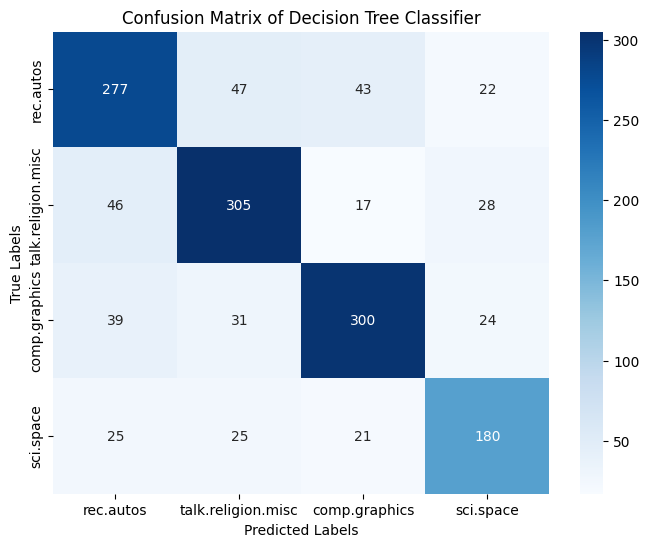

In [ ]:
# import libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the categories
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# Step 2: Load the training and test datasets
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Step 3: Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Step 4: Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, newsgroups_train.target)

# Step 5: Predict the labels for the test data
y_pred = clf.predict(X_test)

# Step 6: Print the Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(newsgroups_test.target, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

# Step 7: Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

**Discussion:** A confusion matrix is generated to visualize the performance of the Decision Tree Classifier on the 20 Newsgroups dataset. It shows the model's predictions by displaying the number of correctly and incorrectly classified samples for each category. The matrix rows correspond to the actual categories, while the columns represent the predicted categories. Each cell indicates how many instances of a given true category were classified as a particular predicted category. This visualization highlights the model's strengths and weaknesses by showing the misclassifications, such as instances where the classifier confuses related topics (e.g., mistaking "sci.space" for "comp.graphics"). By examining this confusion matrix, one can identify which categories are harder to distinguish and where the model struggles. This insight is valuable for diagnosing potential issues, such as inadequate feature extraction or model complexity, and can guide further improvements like hyperparameter tuning or adding more relevant features.